<a href="https://colab.research.google.com/github/n1lays1ngh/DeepLearning-Projects/blob/main/SuperConductivityRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install ucimlrepo

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
superconductivty_data = fetch_ucirepo(id=464)

# data (as pandas dataframes)
X = superconductivty_data.data.features
y = superconductivty_data.data.targets

# metadata
print(superconductivty_data.metadata)

# variable information
print(superconductivty_data.variables)


{'uci_id': 464, 'name': 'Superconductivty Data', 'repository_url': 'https://archive.ics.uci.edu/dataset/464/superconductivty+data', 'data_url': 'https://archive.ics.uci.edu/static/public/464/data.csv', 'abstract': 'Two file s contain data on 21263 superconductors and their relevant features.', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 21263, 'num_features': 81, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['critical_temp'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C53P47', 'creators': ['Kam Hamidieh'], 'intro_paper': {'ID': 452, 'type': 'NATIVE', 'title': 'A data-driven statistical model for predicting the critical temperature of a superconductor', 'authors': 'K. Hamidieh', 'venue': 'Computational materials science', 'year': 2018, 'journal': None, 'DOI': None, 'URL': 'http

In [6]:
X.head(10)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.25,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.25,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809
5,4,88.944468,57.795044,66.361592,36.098926,1.181795,1.225203,122.90607,20.687458,51.968828,...,2.25,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.433013,0.410326
6,4,88.944468,57.682296,66.361592,36.069470,1.181795,1.316857,122.90607,10.765639,51.968828,...,2.25,2.142857,2.213364,2.119268,1.368922,1.194453,1,0.857143,0.433013,0.349927
7,4,76.517718,57.175142,59.310096,35.891368,1.197273,0.943560,122.90607,36.451199,44.289459,...,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697
8,4,76.517718,56.808817,59.310096,35.773432,1.197273,0.981880,122.90607,34.833160,44.289459,...,2.25,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952
9,4,76.517718,56.442492,59.310096,35.655884,1.197273,1.016495,122.90607,33.215121,44.289459,...,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059


In [7]:
X.shape

(21263, 81)

In [8]:
X.isnull().sum()

,0
number_of_elements,0
mean_atomic_mass,0
wtd_mean_atomic_mass,0
gmean_atomic_mass,0
wtd_gmean_atomic_mass,0
...,...
wtd_entropy_Valence,0
range_Valence,0
wtd_range_Valence,0
std_Valence,0


## Train Test Split

In [9]:
X_train_val,X_test,y_train_val,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)


In [10]:
X_train_val.shape

(17010, 81)

In [11]:
X_train,X_val,y_train,y_val = train_test_split(X_train_val,y_train_val,test_size = 0.15,random_state=42)


In [12]:
X_train.shape

(14458, 81)

In [13]:
X_val.shape

(2552, 81)

## Correlation analysis

In [14]:
mi_scores = mutual_info_regression(X, y)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
def plot_mi_scores(scores, n):
    scores = scores.sort_values(ascending=True)

    plt.figure(figsize=(15, 4))   # wider and shorter
    top_scores = scores.tail(n)

    plt.barh(range(len(top_scores)), top_scores.values, color="teal")
    plt.yticks(range(len(top_scores)), top_scores.index)

    plt.title("Mutual Information Scores with Critical Temperature (top 15)", fontsize=14)
    plt.xlabel("Information Gain (Dependency Score)", fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()


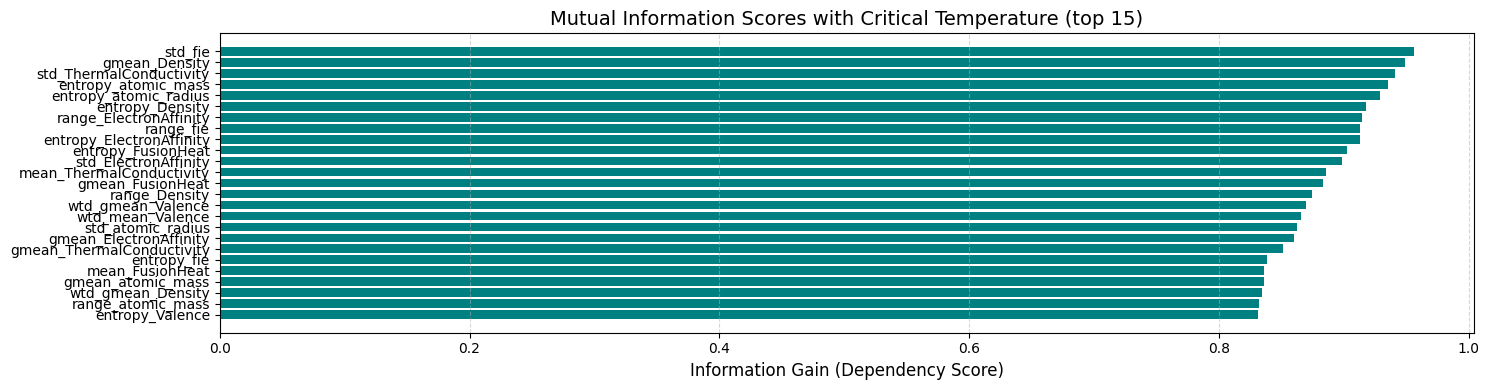

In [56]:
plot_mi_scores(mi_series,25)

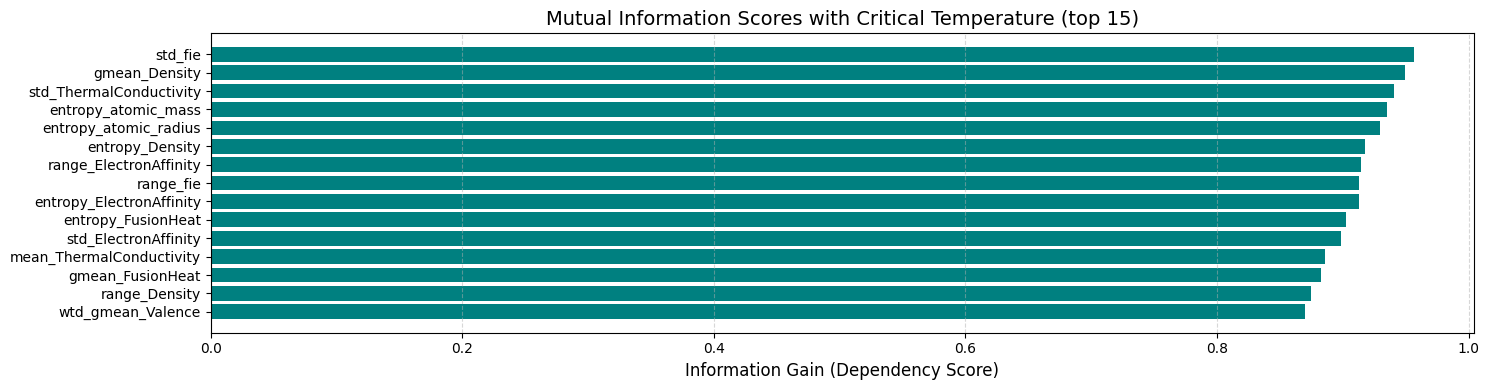

In [57]:
plot_mi_scores(mi_series,15)

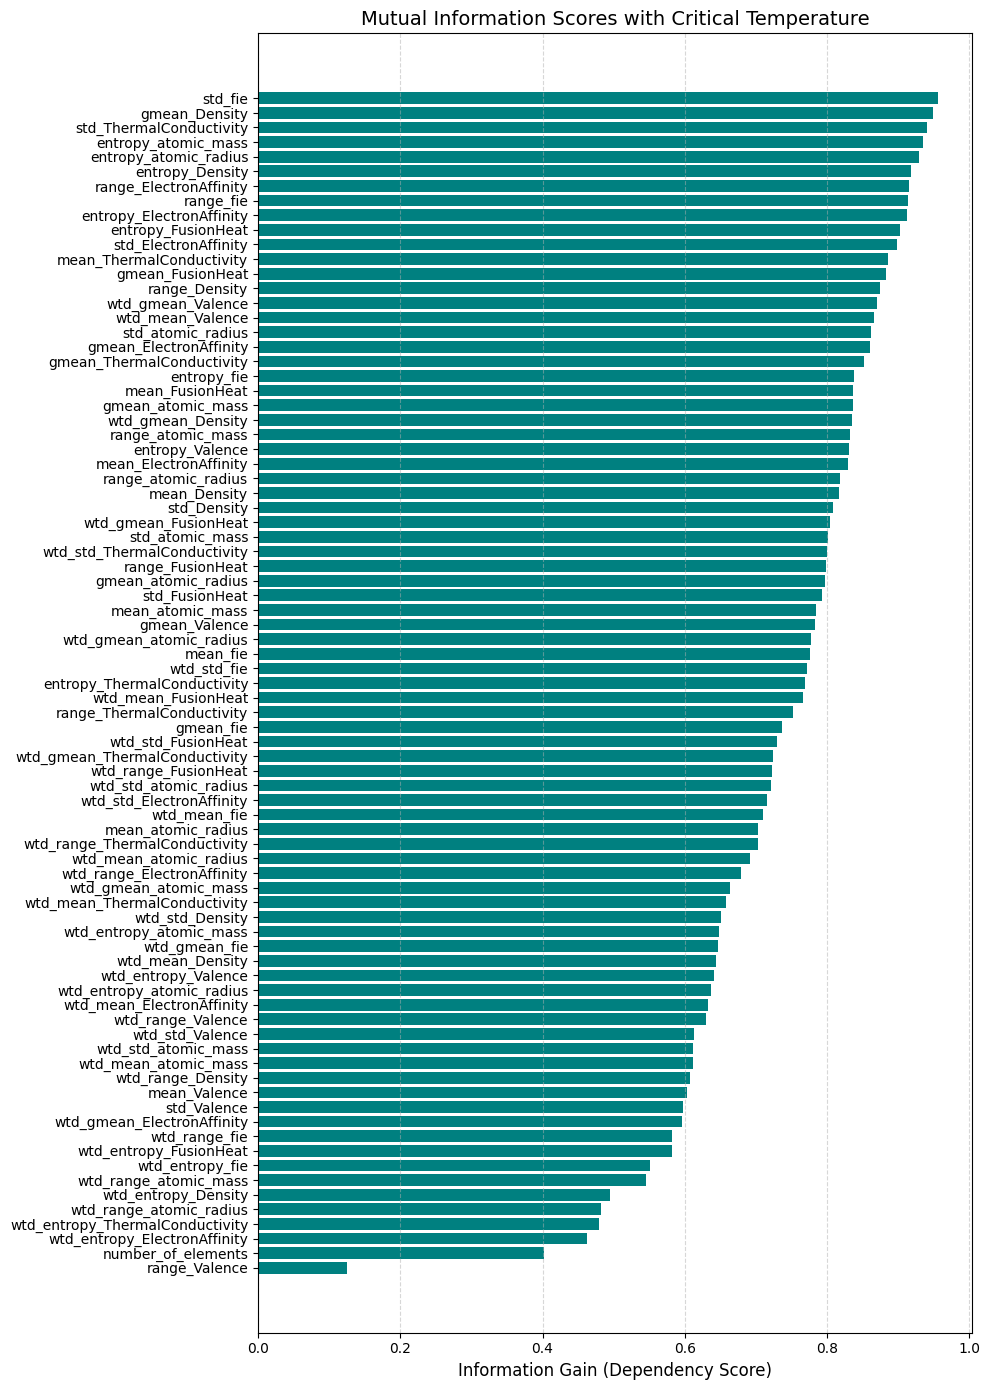

In [17]:
plot_mi_scores(mi_series,81)

Skewness of y_train: 0.8674


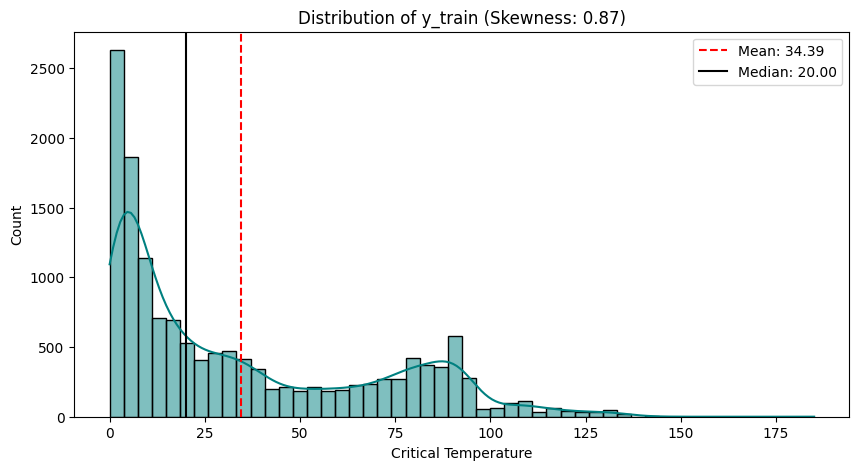

In [18]:
y_train_flat = np.array(y_train).flatten()


y_series = pd.Series(y_train_flat)

skew_val = y_series.skew()
print(f"Skewness of y_train: {skew_val:.4f}")


plt.figure(figsize=(10, 5))
sns.histplot(y_series, kde=True, color='teal', bins=50)


plt.axvline(y_series.mean(), color='red', linestyle='--', label=f'Mean: {y_series.mean():.2f}')
plt.axvline(y_series.median(), color='black', linestyle='-', label=f'Median: {y_series.median():.2f}')

plt.title(f'Distribution of y_train (Skewness: {skew_val:.2f})')
plt.xlabel('Critical Temperature')
plt.legend()
plt.show()

In [19]:
y_train_transformed = np.log1p(y_train)
y_val_transformed = np.log1p(y_val)

Skewness of y_train: -0.3079


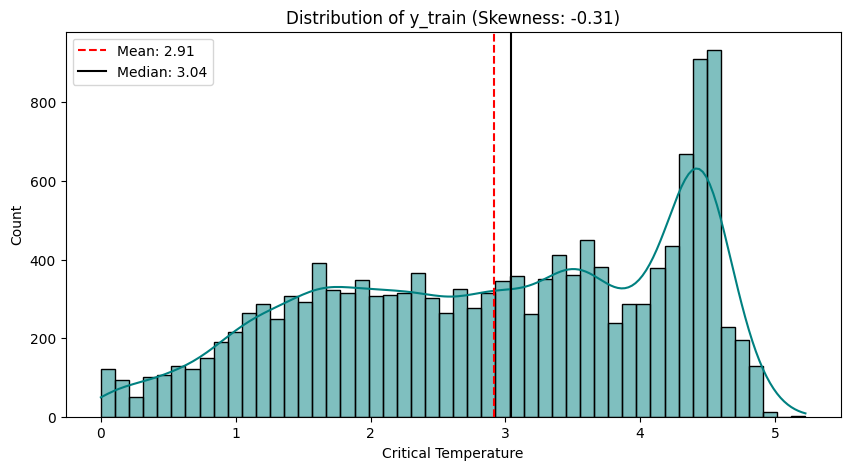

In [20]:
y_train_flat2 = np.array(y_train_transformed).flatten()


y_series = pd.Series(y_train_flat2)

skew_val = y_series.skew()
print(f"Skewness of y_train: {skew_val:.4f}")


plt.figure(figsize=(10, 5))
sns.histplot(y_series, kde=True, color='teal', bins=50)


plt.axvline(y_series.mean(), color='red', linestyle='--', label=f'Mean: {y_series.mean():.2f}')
plt.axvline(y_series.median(), color='black', linestyle='-', label=f'Median: {y_series.median():.2f}')

plt.title(f'Distribution of y_train (Skewness: {skew_val:.2f})')
plt.xlabel('Critical Temperature')
plt.legend()
plt.show()

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Scaling complete.")
print(f"Mean of first feature in X_train_scaled: {X_train_scaled[:,0].mean():.2f}")
print(f"Std dev of first feature in X_train_scaled: {X_train_scaled[:,0].std():.2f}")

Scaling complete.
Mean of first feature in X_train_scaled: -0.00
Std dev of first feature in X_train_scaled: 1.00


In [22]:
X_train_scaled.shape

(14458, 81)

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

In [24]:
model1 = models.Sequential([

    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),


    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model1.compile(optimizer='adam', loss='mse', metrics=['mae'])

model1.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        10,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,633 (84.50 KB)

 Trainable params: 21,249 (83.00 KB)

 Non-trainable params: 384 (1.50 KB)

In [34]:
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

In [26]:
history1 = model1.fit(
    X_train_scaled, y_train_transformed,
    validation_data=(X_val_scaled, y_val_transformed),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - loss: 1.4948 - mae: 0.9074 - val_loss: 0.3651 - val_mae: 0.4565
Epoch 2/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4509 - mae: 0.5257 - val_loss: 0.3320 - val_mae: 0.4170
Epoch 3/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3863 - mae: 0.4802 - val_loss: 0.3257 - val_mae: 0.4051
Epoch 4/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3778 - mae: 0.4705 - val_loss: 0.3221 - val_mae: 0.4148
Epoch 5/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3459 - mae: 0.4530 - val_loss: 0.3059 - val_mae: 0.4071
Epoch 6/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3311 - mae: 0.4384 - val_loss: 0.2958 - val_mae: 0.3745
Epoch 7/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3127 - mae: 0.4282 - val_loss: 0.3044 - val_mae: 0.3709
Epoch 8/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3061 - mae: 0.4209 - val_loss: 0.2935 - val_mae: 0.3783
Epoch 9/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3m

In [30]:
log_predictions = model1.predict(X_test_scaled)
final_predictions = np.expm1(log_predictions).flatten()

mae = mean_absolute_error(y_test, final_predictions)
rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
r2 = r2_score(y_test, final_predictions)

print(f"--- Test Set Results ---")
print(f"Mean Absolute Error (MAE): {mae:.2f} K")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} K")
print(f"R-squared Score (R2): {r2:.4f}")

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
--- Test Set Results ---
Mean Absolute Error (MAE): 7.76 K
Root Mean Squared Error (RMSE): 12.43 K
R-squared Score (R2): 0.8658


In [33]:
model2 = models.Sequential([

    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),

    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model2.compile(optimizer='adam', loss='mse', metrics=['mae'])

model2.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │        10,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,657 (151.00 KB)

 Trainable params: 38,017 (148.50 KB)

 Non-trainable params: 640 (2.50 KB)

In [35]:
history2 = model2.fit(
    X_train_scaled, y_train_transformed,
    validation_data=(X_val_scaled, y_val_transformed),
    epochs=100,
    batch_size=32,
    callbacks=[reduce_lr, early_stop], # Both callbacks active
    verbose=1
)

Epoch 1/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 2.9370 - mae: 1.2128 - val_loss: 0.4197 - val_mae: 0.4924 - learning_rate: 0.0010
Epoch 2/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5171 - mae: 0.5631 - val_loss: 0.3610 - val_mae: 0.4230 - learning_rate: 0.0010
Epoch 3/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4597 - mae: 0.5275 - val_loss: 0.3706 - val_mae: 0.4374 - learning_rate: 0.0010
Epoch 4/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3996 - mae: 0.4902 - val_loss: 0.3461 - val_mae: 0.4379 - learning_rate: 0.0010
Epoch 5/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3583 - mae: 0.4619 - val_loss: 0.3336 - val_mae: 0.4284 - learning_rate: 0.0010
Epoch 6/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3678 - mae: 0.4656 - val_loss: 0.3149 - val_mae: 0.3965 - learning_rate: 0.0010
Epoch 7/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3418 - mae: 0.4501 - val_loss: 0.3095 - val_mae: 0.4083 - learning_rate: 0.00

In [36]:
log_predictions = model2.predict(X_test_scaled)
final_predictions = np.expm1(log_predictions).flatten()

mae = mean_absolute_error(y_test, final_predictions)
rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
r2 = r2_score(y_test, final_predictions)

print(f"--- Test Set Results ---")
print(f"Mean Absolute Error (MAE): {mae:.2f} K")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} K")
print(f"R-squared Score (R2): {r2:.4f}")

133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
--- Test Set Results ---
Mean Absolute Error (MAE): 7.76 K
Root Mean Squared Error (RMSE): 12.16 K
R-squared Score (R2): 0.8716


In [37]:
reduce_lr2 = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=4,
    min_lr=1e-6,
    verbose=1
)

In [39]:
model3 = models.Sequential([

    layers.Dense(128, input_shape=(X_train_scaled.shape[1],)),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.01),
    layers.Dropout(0.2),


    layers.Dense(128),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.01),
    layers.Dropout(0.1),


    layers.Dense(64),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.01),


    layers.Dense(32),
    layers.LeakyReLU(alpha=0.01),


    layers.Dense(1)
])

model3.compile(optimizer='adam', loss='mse', metrics=['mae'])

model3.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 128)            │        10,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,657 (151.00 KB)

 Trainable params: 38,017 (148.50 KB)

 Non-trainable params: 640 (2.50 KB)

In [40]:
history3 = model3.fit(
    X_train_scaled, y_train_transformed,
    validation_data=(X_val_scaled, y_val_transformed),
    epochs=150,
    batch_size=16,
    callbacks=[reduce_lr2, early_stop], # Both callbacks active
    verbose=1
)

Epoch 1/150
904/904 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.3330 - mae: 0.8189 - val_loss: 0.3974 - val_mae: 0.4594 - learning_rate: 0.0010
Epoch 2/150
904/904 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4459 - mae: 0.5188 - val_loss: 0.3540 - val_mae: 0.4517 - learning_rate: 0.0010
Epoch 3/150
904/904 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3896 - mae: 0.4817 - val_loss: 0.3331 - val_mae: 0.4123 - learning_rate: 0.0010
Epoch 4/150
904/904 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3776 - mae: 0.4733 - val_loss: 0.3292 - val_mae: 0.4005 - learning_rate: 0.0010
Epoch 5/150
904/904 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.3497 - mae: 0.4484 - val_loss: 0.3297 - val_mae: 0.3943 - learning_rate: 0.0010
Epoch 6/150
904/904 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3359 - mae: 0.4435 - val_loss: 0.3400 - val_mae: 0.4254 - learning_rate: 0.0010
Epoch 7/150
904/904 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3208 - mae: 0.4324 - val_loss: 0.3048 - val_mae: 0.3890 - learning_rate: 0.001

In [41]:
log_predictions = model3.predict(X_test_scaled)
final_predictions = np.expm1(log_predictions).flatten()

mae = mean_absolute_error(y_test, final_predictions)
rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
r2 = r2_score(y_test, final_predictions)

print(f"--- Test Set Results ---")
print(f"Mean Absolute Error (MAE): {mae:.2f} K")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} K")
print(f"R-squared Score (R2): {r2:.4f}")

133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
--- Test Set Results ---
Mean Absolute Error (MAE): 8.71 K
Root Mean Squared Error (RMSE): 13.38 K
R-squared Score (R2): 0.8446


In [42]:
model4 = models.Sequential([

    layers.Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),

    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model4.compile(optimizer='adam', loss='mse', metrics=['mae'])

model4.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 256)            │        20,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,049 (258.00 KB)

 Trainable params: 65,153 (254.50 KB)

 Non-trainable params: 896 (3.50 KB)

In [43]:
early_stop3 = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

reduce_lr3 = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.4,
    patience=7,
    min_lr=1e-6,
    verbose=1
)

In [44]:
history4 = model4.fit(
    X_train_scaled, y_train_transformed,
    validation_data=(X_val_scaled, y_val_transformed),
    epochs=200,
    batch_size=16,
    callbacks=[early_stop3, reduce_lr3],
    verbose=1
)

Epoch 1/200
904/904 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 1.5744 - mae: 0.8980 - val_loss: 0.4399 - val_mae: 0.5091 - learning_rate: 0.0010
Epoch 2/200
904/904 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.4796 - mae: 0.5375 - val_loss: 0.3944 - val_mae: 0.4417 - learning_rate: 0.0010
Epoch 3/200
904/904 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.4205 - mae: 0.5042 - val_loss: 0.3848 - val_mae: 0.4690 - learning_rate: 0.0010
Epoch 4/200
904/904 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.3961 - mae: 0.4850 - val_loss: 0.3406 - val_mae: 0.4268 - learning_rate: 0.0010
Epoch 5/200
904/904 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3787 - mae: 0.4693 - val_loss: 0.3161 - val_mae: 0.3915 - learning_rate: 0.0010
Epoch 6/200
904/904 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.3459 - mae: 0.4501 - val_loss: 0.3197 - val_mae: 0.4004 - learning_rate: 0.0010
Epoch 7/200
904/904 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.3327 - mae: 0.4427 - val_loss: 0.3061 - val_mae: 0.3984 - learning_rate: 0.001

In [46]:
log_predictions = model4.predict(X_test_scaled)
final_predictions = np.expm1(log_predictions).flatten()

mae = mean_absolute_error(y_test, final_predictions)
rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
r2 = r2_score(y_test, final_predictions)

print(f"--- Test Set Results ---")
print(f"Mean Absolute Error (MAE): {mae:.2f} K")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} K")
print(f"R-squared Score (R2): {r2:.4f}")

133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step
--- Test Set Results ---
Mean Absolute Error (MAE): 7.42 K
Root Mean Squared Error (RMSE): 11.80 K
R-squared Score (R2): 0.8791


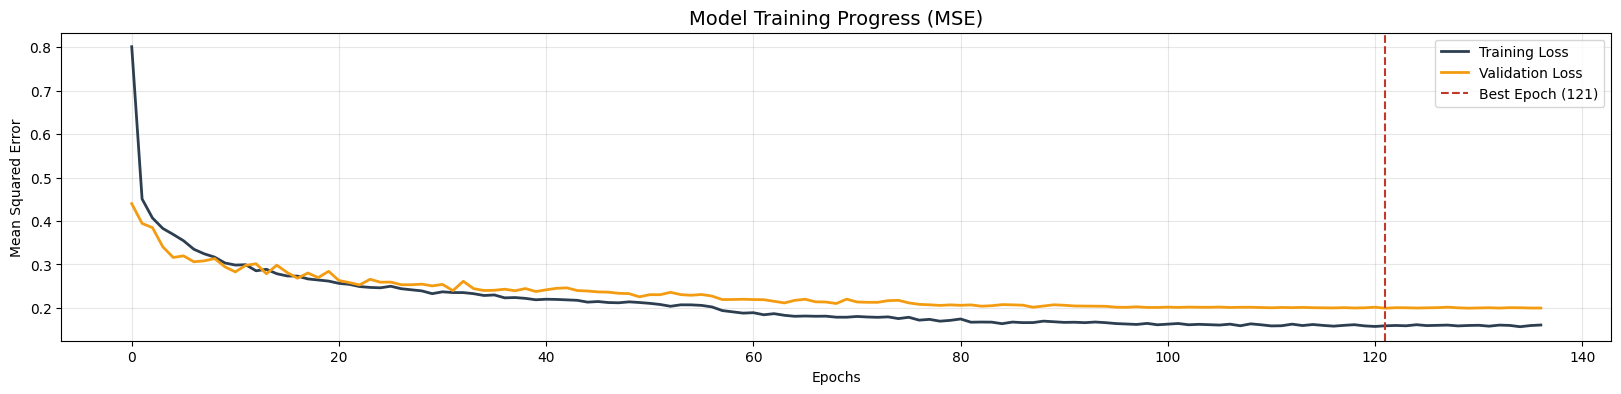

In [61]:
def plot_history(history):
    plt.figure(figsize=(20, 4))
    plt.plot(history.history['loss'], label='Training Loss', color='#2c3e50', linewidth=2)
    plt.plot(history.history['val_loss'], label='Validation Loss', color='#f39c12', linewidth=2)

    # Mark the best epoch (where weights were restored)
    best_epoch = np.argmin(history.history['val_loss'])
    plt.axvline(best_epoch, color='#c0392b', linestyle='--', label=f'Best Epoch ({best_epoch})')

    plt.title('Model Training Progress (MSE)', fontsize=14)
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Call the function
plot_history(history4)

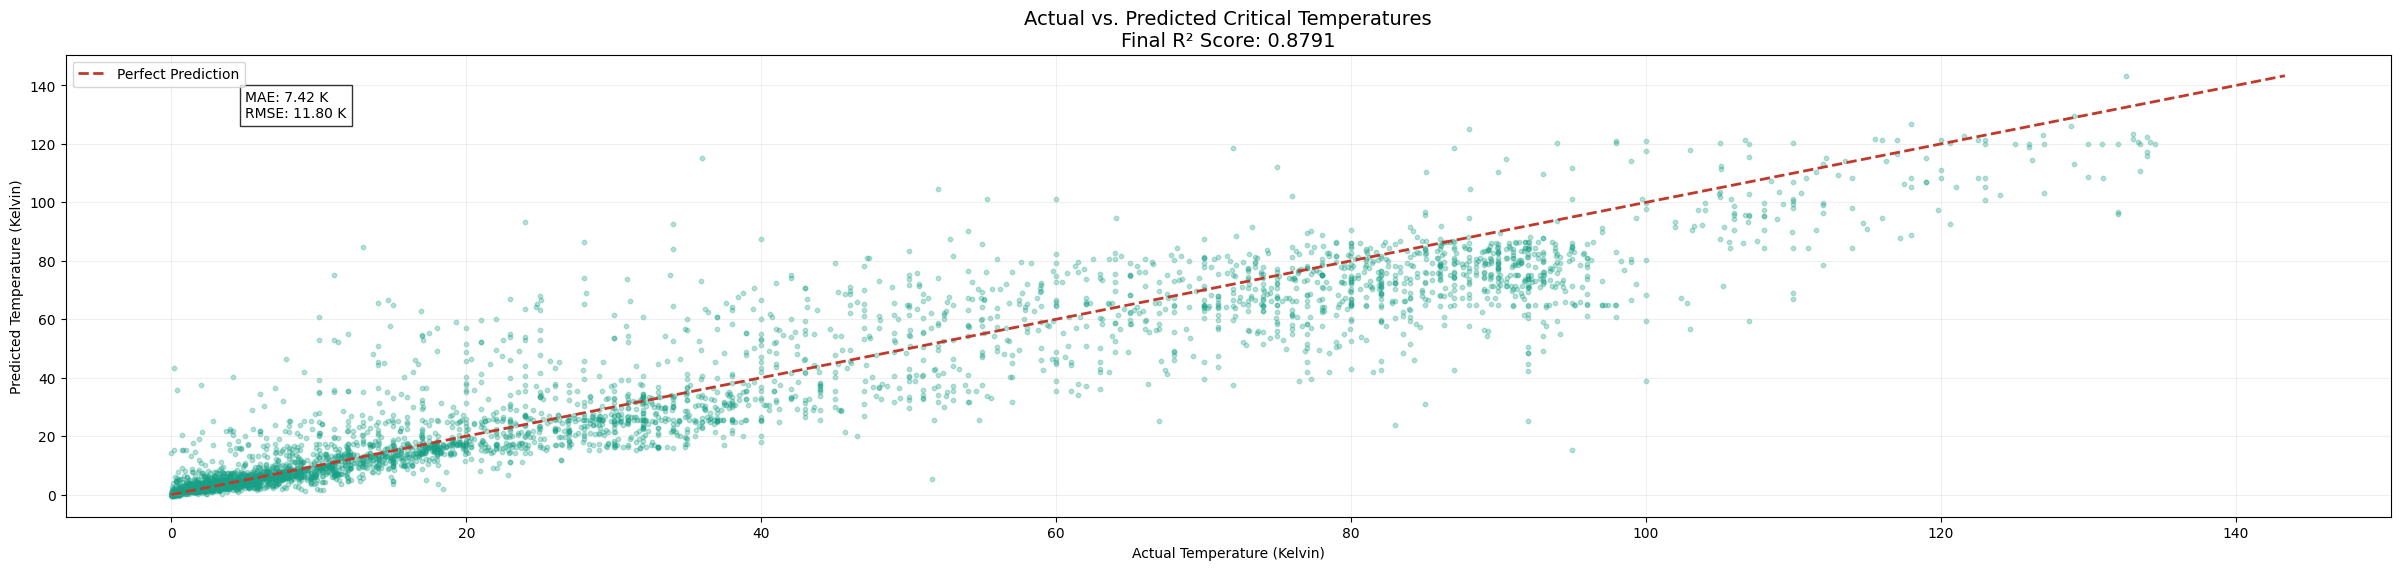

In [64]:
def plot_final_results(y_true, y_pred, r2_score):
    # Ensure inputs are numeric floats and 1-dimensional
    y_true = np.array(y_true).astype(float).flatten()
    y_pred = np.array(y_pred).astype(float).flatten()

    plt.figure(figsize=(30, 6))

    # Scatter plot
    plt.scatter(y_true, y_pred, alpha=0.3, color='#16a085', s=10)

    # Perfect Prediction Line
    # Now max() will work because it's comparing floats
    max_val = max(np.max(y_true), np.max(y_pred))
    plt.plot([0, max_val], [0, max_val], color='#c0392b', linestyle='--', linewidth=2, label='Perfect Prediction')

    plt.title(f'Actual vs. Predicted Critical Temperatures\nFinal R² Score: {r2_score:.4f}', fontsize=14)
    plt.xlabel('Actual Temperature (Kelvin)')
    plt.ylabel('Predicted Temperature (Kelvin)')
    plt.legend()
    plt.grid(True, alpha=0.2)

    # Add a text box with metrics
    plt.text(5, max_val * 0.9, f"MAE: 7.42 K\nRMSE: 11.80 K",
             bbox=dict(facecolor='white', alpha=0.8))

    plt.show()

# Call the function again
plot_final_results(y_test, final_predictions, 0.8791)